In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/electricity-prices/clean_data.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Read the dataset into a DataFrame
df = pd.read_csv('/kaggle/input/electricity-prices/clean_data.csv')
df.head()

,year,month,stateDescription,sectorName,customers,price,revenue,sales
0,2001,1,Wyoming,all sectors,NaN,4.31,48.12840,1116.17208
1,2001,1,Wyoming,commercial,NaN,5.13,12.67978,247.08691
2,2001,1,Wyoming,industrial,NaN,3.26,19.60858,602.30484
3,2001,1,Wyoming,other,NaN,4.75,0.76868,16.17442
4,2001,1,Wyoming,residential,NaN,6.01,15.07136,250.60591


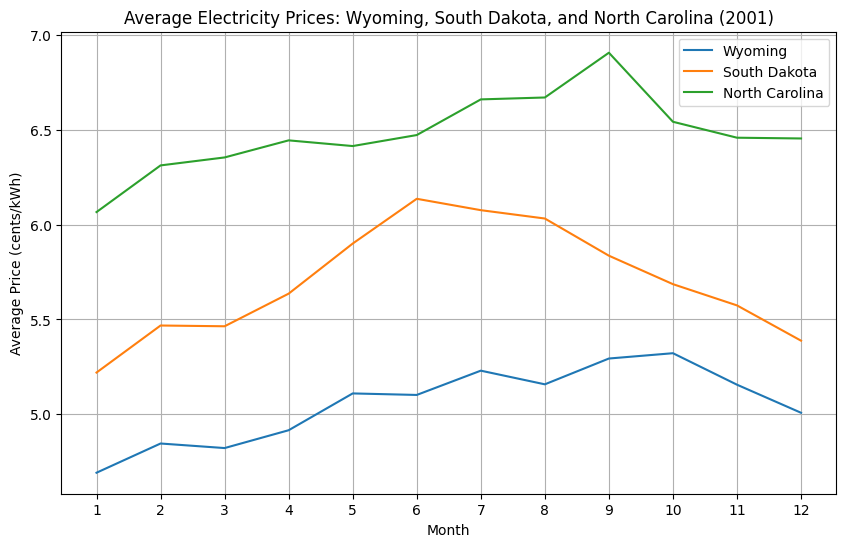

In [4]:
# Filter the DataFrame for Wyoming, South Dakota, and North Carolina in 2001
wyoming_2001 = df[(df['stateDescription'] == 'Wyoming') & (df['year'] == 2001)]
south_dakota_2001 = df[(df['stateDescription'] == 'South Dakota') & (df['year'] == 2001)]
north_carolina_2001 = df[(df['stateDescription'] == 'North Carolina') & (df['year'] == 2001)]

# Calculate the average price per month for each state
avg_price_wyoming = wyoming_2001.groupby('month')['price'].mean()
avg_price_south_dakota = south_dakota_2001.groupby('month')['price'].mean()
avg_price_north_carolina = north_carolina_2001.groupby('month')['price'].mean()

# Create a line plot to compare the average prices
plt.figure(figsize=(10, 6))
plt.plot(avg_price_wyoming.index, avg_price_wyoming.values, label='Wyoming')
plt.plot(avg_price_south_dakota.index, avg_price_south_dakota.values, label='South Dakota')
plt.plot(avg_price_north_carolina.index, avg_price_north_carolina.values, label='North Carolina')
plt.xlabel('Month')
plt.ylabel('Average Price (cents/kWh)')
plt.title('Average Electricity Prices: Wyoming, South Dakota, and North Carolina (2001)')
plt.xticks(range(1, 13))
plt.legend()
plt.grid(True)
plt.show()